# Analytics Silver - Diabetes Health Indicators

**Objetivo da Camada Silver:**
Apresentar a análise exploratória dos dados **após o tratamento e limpeza** realizado na etapa de ETL. Nesta fase, os dados já devem estar padronizados e sem nulos.

**Requisitos atendidos:**
1.  Verificação da integridade dos dados pós-limpeza.
2.  Análise de correlação entre variáveis.
3.  Visualização da distribuição da classe alvo.
4.  Relação entre fatores de risco (IMC, Pressão, Idade) e Diabetes.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Carregamento dos Dados Tratados
Carregar o dataset gerado pelo ETL. Espera-se que este arquivo não contenha valores nulos ou duplicatas indesejadas.

In [63]:
df_silver = pd.read_csv('data/diabetes_silver.csv') 

print(f"Dimensões do Dataset Limpo: {df_silver.shape}")
display(df_silver.head())

Dimensões do Dataset Limpo: (229781, 26)


,patient_id,diabetes_status,high_bp,high_chol,cholesterol_check,bmi,bmi_category,smoker,stroke,heart_disease_attack,...,gen_health_score,general_health,mental_health_days,physical_health_days,diff_walking,sex_desc,age_group,education_level,income_level_raw,risk_factors_count
0,1,Não,Sim,Sim,Sim,40.0,Obesidade,Sim,Não,Não,...,5.0,Ruim,18.0,15.0,Sim,Feminino,60-64,Médio incompleto,3.0,4
1,2,Não,Não,Não,Não,25.0,Sobrepeso,Sim,Não,Não,...,3.0,Boa,0.0,0.0,Não,Feminino,50-54,Superior completo,1.0,1
2,3,Não,Sim,Sim,Sim,28.0,Sobrepeso,Não,Não,Não,...,5.0,Ruim,30.0,30.0,Sim,Feminino,60-64,Médio incompleto,8.0,2
3,4,Não,Sim,Não,Sim,27.0,Sobrepeso,Não,Não,Não,...,2.0,Muito Boa,0.0,0.0,Não,Feminino,70-74,Fundamental completo,6.0,1
4,5,Não,Sim,Sim,Sim,24.0,Peso Normal,Não,Não,Não,...,2.0,Muito Boa,3.0,0.0,Não,Feminino,70-74,Médio completo,4.0,2


In [64]:
df_silver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229781 entries, 0 to 229780
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   patient_id            229781 non-null  int64  
 1   diabetes_status       229781 non-null  object 
 2   high_bp               229781 non-null  object 
 3   high_chol             229781 non-null  object 
 4   cholesterol_check     229781 non-null  object 
 5   bmi                   229781 non-null  float64
 6   bmi_category          229781 non-null  object 
 7   smoker                229781 non-null  object 
 8   stroke                229781 non-null  object 
 9   heart_disease_attack  229781 non-null  object 
 10  physical_activity     229781 non-null  object 
 11  eats_fruits           229781 non-null  object 
 12  eats_veggies          229781 non-null  object 
 13  heavy_alcohol         229781 non-null  object 
 14  has_healthcare        229781 non-null  object 
 15  

### 2. Análise de Correlação e Multicolinearidade
Para entender quais variáveis estão mais associadas ao diagnóstico de diabetes, calculamos a **Matriz de Correlação de Pearson**.

**Observações Importantes:**
1.  **Transformação:** Como a base Silver possui rótulos qualitativos ("Sim", "Não", "Feminino"), aplicamos uma codificação numérica temporária (`Label Encoding`) apenas para este cálculo matemático.
2.  **Destaques:** As variáveis com tons mais fortes (vermelho/laranja) em relação à linha `diabetes_status` indicam os fatores de risco mais fortes. Espera-se alta correlação com **`general_health`** (Saúde Geral), **`bmi`** (IMC) e **`high_bp`** (Pressão Alta).
3.  **Multicolinearidade:** Também observamos se variáveis explicativas têm correlação forte entre si (ex: `physical_health_days` e `general_health`), o que pode exigir seleção de features na etapa Gold.

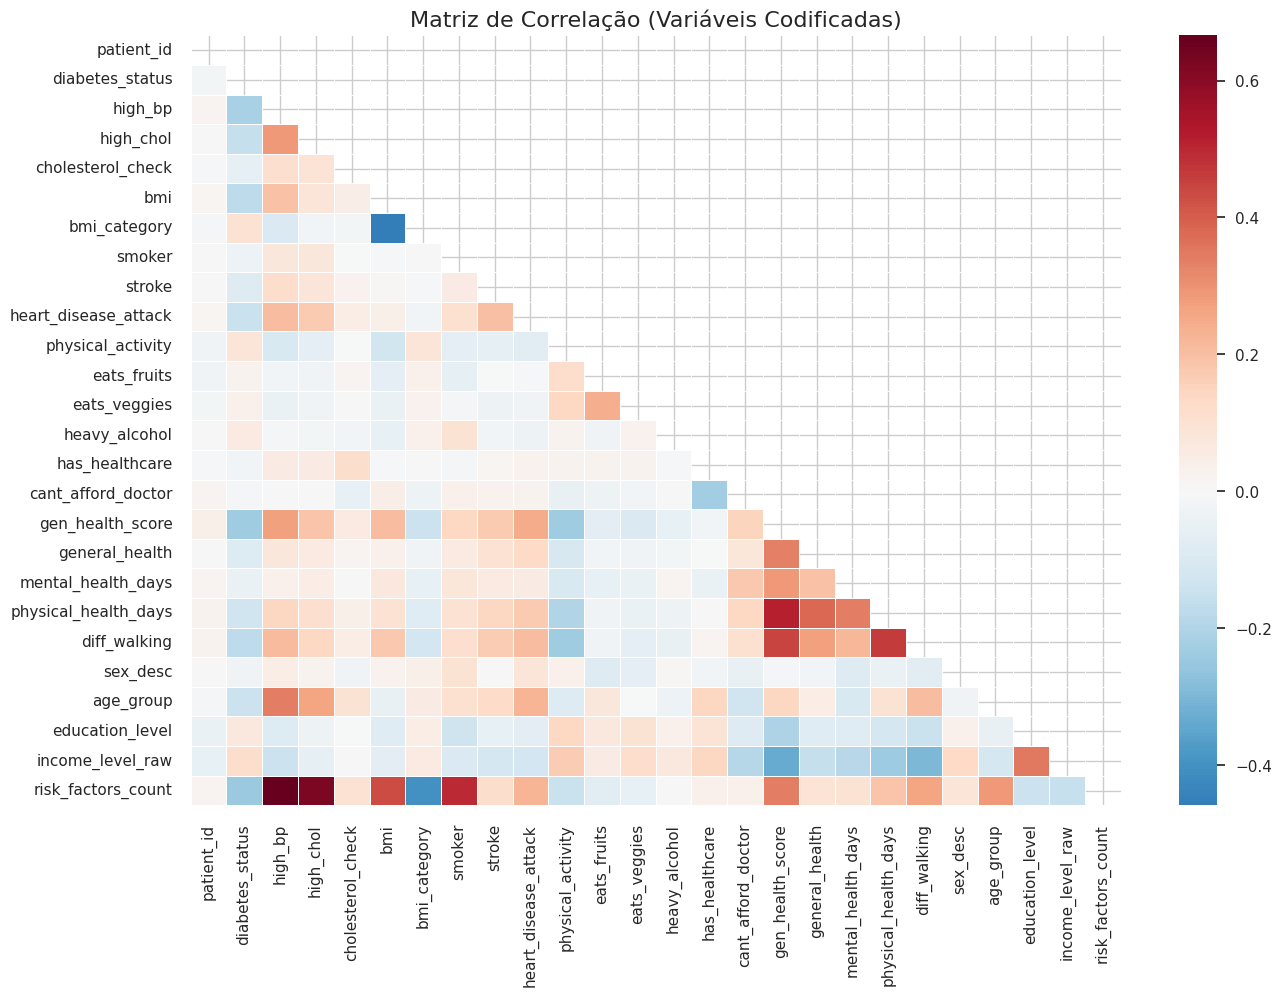

In [65]:

plt.figure(figsize=(15, 10))

# 1. Criar uma cópia apenas para cálculo da correlação
df_corr = df_silver.copy()

# 2. Transformar colunas de texto em números automaticamente
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = df_corr[col].astype('category').cat.codes

# 3. Calcular a correlação
corr = df_corr.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# 4. Gerar o Heatmap
sns.heatmap(
    corr, 
    mask=mask,
    annot=False, 
    cmap='RdBu_r', 
    linewidths=0.5,
    center=0
)

plt.title('Matriz de Correlação (Variáveis Codificadas)', fontsize=16)
plt.show()

### 4. Relação: Índice de Massa Corporal (IMC) vs Diabetes
O Boxplot abaixo permite comparar a distribuição estatística do IMC entre os grupos diagnosticados.

**Interpretação do Gráfico:**
* **Mediana (Linha central):** A linha dentro da caixa dos grupos "Diabetes" e "Pré-Diabetes" está visivelmente acima do grupo "Não". Isso confirma que o IMC elevado é um fator discriminante forte.
* **Dispersão:** A "caixa" (intervalo interquartil) dos diabéticos é mais deslocada para cima.

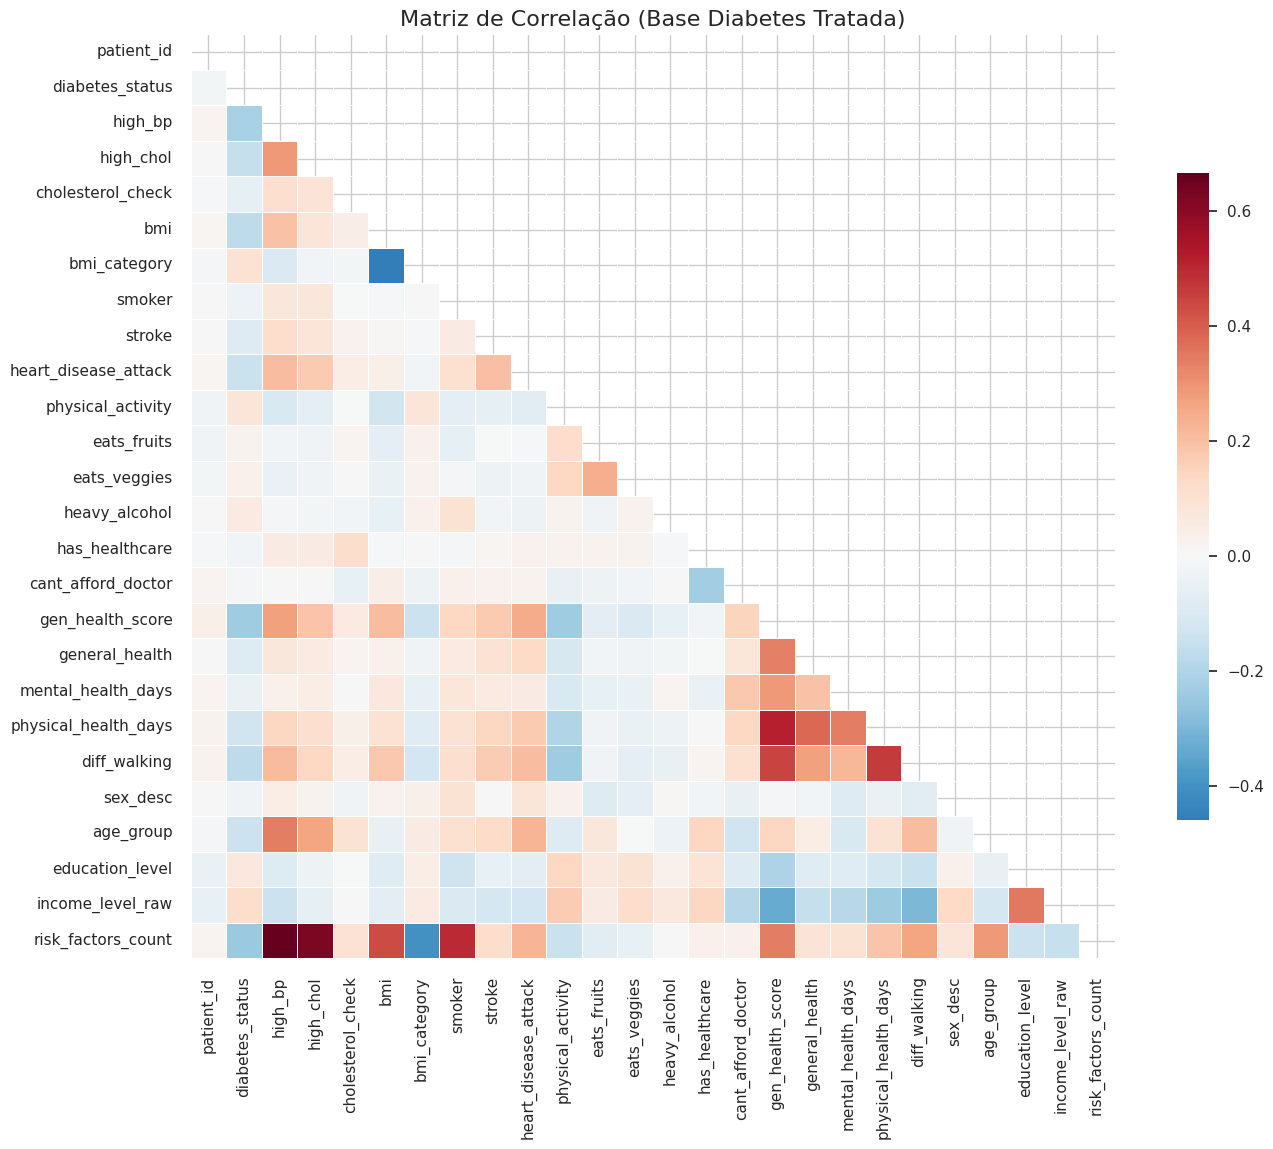

In [ ]:
plt.figure(figsize=(16, 12))

# 1. Criar cópia para não estragar o dataframe original
df_corr = df_silver.copy()

# 2. Converter TUDO que é texto para números
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = df_corr[col].astype('category').cat.codes

# 3. Calcular correlação
corr = df_corr.corr()

# 4. Plotar Heatmap
mask = np.triu(np.ones_like(corr, dtype=bool)) 
sns.heatmap(
    corr, 
    mask=mask,
    cmap='RdBu_r',   
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .7}
)

plt.title('Matriz de Correlação (Base Diabetes Tratada)', fontsize=16)
plt.show()

### 4. Relação: Índice de Massa Corporal (IMC) vs Diabetes
O Boxplot abaixo permite comparar a distribuição estatística do IMC entre os grupos diagnosticados.

**Interpretação do Gráfico:**
* **Mediana (Linha central):** A linha dentro da caixa dos grupos "Diabetes" e "Pré-Diabetes" está visivelmente acima do grupo "Não". Isso confirma que o IMC elevado é um fator discriminante forte.
* **Dispersão:** A "caixa" (intervalo interquartil) dos diabéticos é mais deslocada para cima.

/tmp/ipykernel_141370/2179629650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes_status', y='bmi', data=df_silver, palette="Set2")


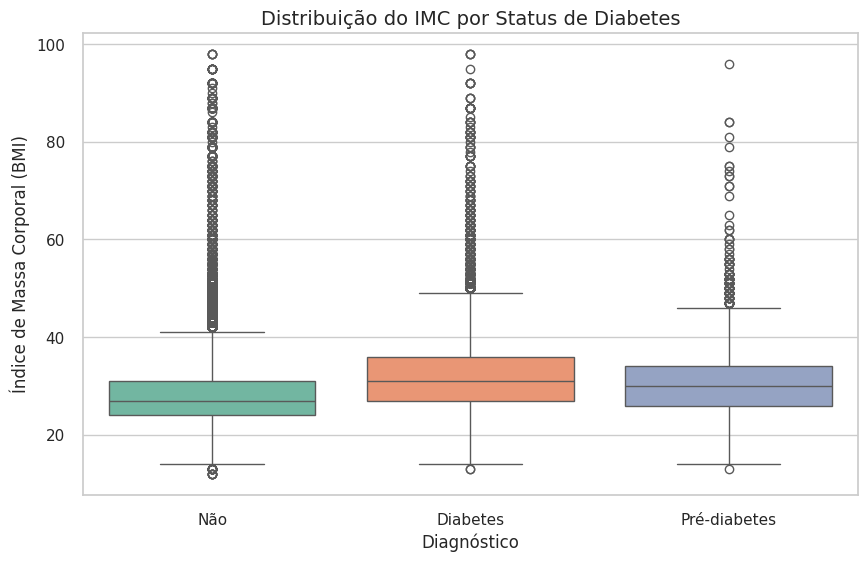

In [ ]:
# CÉLULA: Distribuição de IMC por Status de Diabetes
plt.figure(figsize=(10, 6))

sns.boxplot(x='diabetes_status', y='bmi', data=df_silver, palette="Set2")

plt.title('Distribuição do IMC por Status de Diabetes', fontsize=14)
plt.xlabel('Diagnóstico')
plt.ylabel('Índice de Massa Corporal (BMI)')
plt.show()

### 5. Prevalência por Faixa Etária
Como a idade influencia a probabilidade de diagnóstico.

**Insights:**
* **Tendência Crescente:** O gráfico revela uma tendência clara: a proporção de casos de diabetes aumenta conforme a faixa etária avança.
* **Grupo de Risco:** A prevalência se torna muito mais acentuada a partir da faixa dos 50 anos, atingindo o pico nas faixas de 60-75 anos.

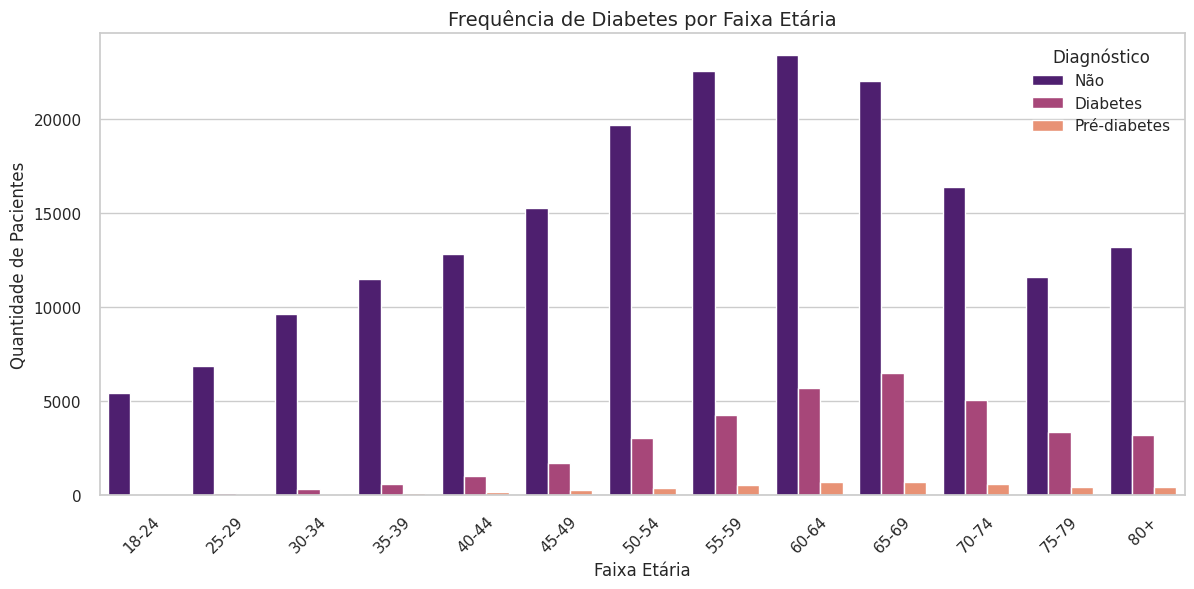

In [ ]:
plt.figure(figsize=(14, 6))

# 1. Definir a ordem correta das faixas etárias
order_age = sorted(df_silver['age_group'].unique())

# 2. Criar o gráfico de barras
sns.countplot(
    x='age_group', 
    hue='diabetes_status', 
    data=df_silver, 
    order=order_age, 
    palette='magma'
)

plt.title('Frequência de Diabetes por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Pacientes')
plt.legend(title='Diagnóstico')
plt.xticks(rotation=45) # Inclinar o texto para ler melhor
plt.show()

### 6. Autopercepção de Saúde vs Diagnóstico
A variável `general_health` reflete como o paciente avalia sua própria saúde (de "Excelente" a "Ruim").

**Conclusão Visual:**
* **Correlação Inversa:** Existe uma relação inversa clara. Pacientes que se declaram com saúde "Excelente" ou "Muito Boa" raramente possuem diabetes.
* **Indicador Forte:** A grande maioria dos diabéticos avalia sua saúde apenas como "Razoável" ou "Ruim". Isso valida esta variável como um forte preditor subjetivo para a presença da doença crônica.

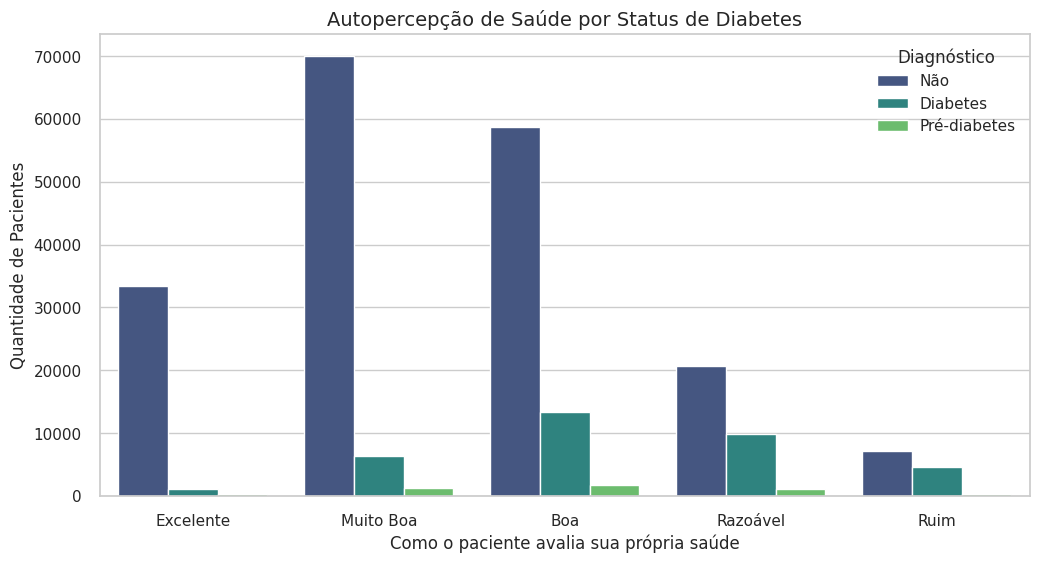

In [69]:
# CÉLULA: Autopercepção de Saúde (CORRIGIDO)
plt.figure(figsize=(12, 6))

# Correção: x='general_health' e hue='diabetes_status'
# Definimos a ordem para o gráfico fazer sentido (do melhor para o pior)
ordem_saude = ['Excelente', 'Muito Boa', 'Boa', 'Razoável', 'Ruim']

sns.countplot(
    x='general_health', 
    hue='diabetes_status', 
    data=df_silver, 
    palette='viridis',
    order=ordem_saude
)

plt.title('Autopercepção de Saúde por Status de Diabetes', fontsize=14)
plt.xlabel('Como o paciente avalia sua própria saúde')
plt.ylabel('Quantidade de Pacientes')
plt.legend(title='Diagnóstico')
plt.show()